<a href="https://colab.research.google.com/github/farhan1503001/Generative-Deep-Learning-With-Tensorflow/blob/main/Deep%20Autoencoder/Deep_Autoencoder_Using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Autoencoder 
**Here our encoder and decoder both will have multiple deep neural network Dense layers unlike previous ones**

In [1]:
#importing the necessary libraries
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

**Image Preprocessing Function**

In [2]:
#Normalizes and flattens the image as for model
def map_image(image,label):
  """
  This function first normalizes and then flattens each image
  """
  #Now at first make it a float array
  image=tf.cast(image,dtype=tf.float32)
  #Now normalize it
  image=image/255.0
  #Now flattening it
  image=tf.reshape(image,(784,))

  return image,image


**Loading MNIST dataset and preprocessing it**

In [3]:
Shuffle=1024
Batch_size=128
train_dataset=tfds.load('mnist',as_supervised=True,split='train')
train_dataset=train_dataset.map(map_image)
train_dataset=train_dataset.shuffle(Shuffle).batch(Batch_size).repeat()

test_dataset=tfds.load('mnist',as_supervised=True,split='test')
test_dataset=test_dataset.map(map_image)
test_dataset=test_dataset.batch(Batch_size).repeat()

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


**Building the Model**

In [9]:
def deep_autoencoder(inputs):
  """
  Builds both encoder and decoder both using dense layer
  """
  encoder=keras.layers.Dense(units=128,activation='relu')(inputs)
  encoder=keras.layers.Dense(units=64,activation='relu')(encoder)
  encoder=keras.layers.Dense(units=32,activation='relu')(encoder)
  #Encoder complete
  #Decoder starts
  decoder=keras.layers.Dense(units=64,activation='relu')(encoder)
  decoder=keras.layers.Dense(units=128,activation='relu')(decoder)
  decoder=keras.layers.Dense(units=784,activation='sigmoid')(decoder)

  return encoder,decoder

In [10]:
#Now creating everything 
inputs=keras.layers.Input(shape=(784,))

encoder_out,decoder_out=deep_autoencoder(inputs=inputs)
#Encoder model
deep_encoder_model=keras.Model(inputs=inputs,outputs=encoder_out)

deep_autoencoder_model=keras.Model(inputs=inputs,outputs=decoder_out)

**Training the model**

In [11]:
train_steps = 60000 // Batch_size

deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 4s 7ms/step - loss: 0.2012
Epoch 2/50
468/468 [==============================] - 5s 10ms/step - loss: 0.1270
Epoch 3/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1136
Epoch 4/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1068
Epoch 5/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1025
Epoch 6/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0991
Epoch 7/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0967
Epoch 8/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0950
Epoch 9/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0936
Epoch 10/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0923
Epoch 11/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0913
Epoch 12/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0905
Epoch 13/50
468/468 [===

**Visualization**

In [12]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

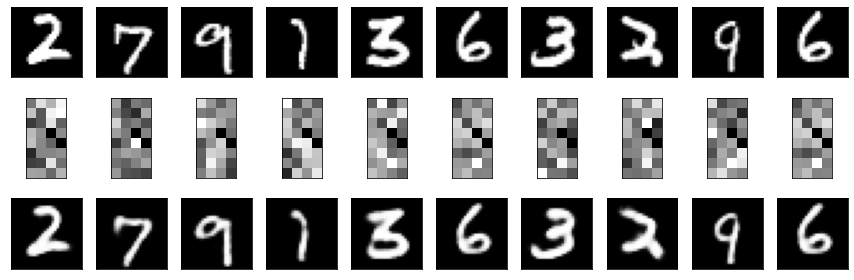

In [13]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(Batch_size, size=10)

# get the encoder output
encoded_predicted = deep_encoder_model.predict(test_dataset)

# get a prediction for the test batch
deep_predicted = deep_autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])